In [66]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import os

In [67]:
# Get data
df = pd.read_csv('vocab_cs_mod.txt', header=None, index_col=None, delim_whitespace=True)
df = df.rename(columns={0: 'k', 1: 'n_sub_k'})

Text(0, 0.5, 'log CCDF')

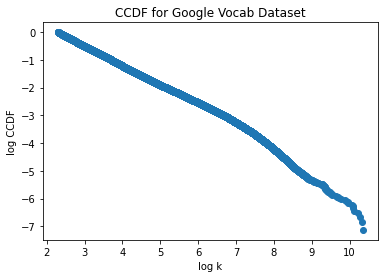

In [69]:
#Q
df['pdf'] = df['n_sub_k'] / df['n_sub_k'].sum()
df['cdf'] = df['pdf'][::-1].cumsum()
df['ccdf'] = np.ones(len(df['cdf'])) - df['cdf']

plt.scatter(x=np.log10(df['k']), y=np.log10(df['ccdf']))
plt.title('CCDF for Google Vocab Dataset')
plt.xlabel('log k')
plt.ylabel('log CCDF')


In [70]:
#QQ
def fit_lin_reg(lb, ub):
    # critical value for 0.025 of a normal distribution (CLT)
    z = 1.96
    interval_df  = df[(np.log10(df['k']) > lb) & (np.log10(df['k']) <= ub)]
    x = np.log10(interval_df['k'])
    y = np.log10(interval_df['ccdf'])

    x_cleaned = x[~np.isnan(y)]
    y_cleaned = y[~np.isnan(y)]

    model = stats.linregress(x_cleaned, y_cleaned)

    ci = (model.slope - (z * model.stderr), model.slope + (z * model.stderr))
    print("CI for the interval ("+str(lb)+", "+str(ub)+"): ("+str(ci[0])+ ", "+str(ci[1])+")")


fit_lin_reg(0, 7)
fit_lin_reg(7.5, 10)


CI for the interval (0, 7): (-0.6606165679798968, -0.6604577343501159)
CI for the interval (7.5, 10): (-1.1077348118674557, -1.1029509611658157)


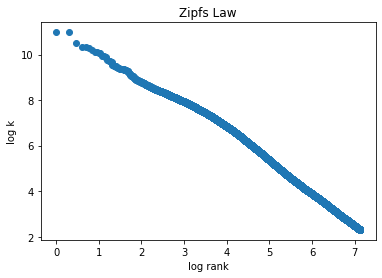

In [29]:
# QQQ
# x axis
raw_counts = np.sort(np.genfromtxt("google_vocab_rawwordfreqs.txt", delimiter=", "))[::-1]
ranks = [i+1 for i in range(len(raw_counts))]
plt.scatter(np.log10(ranks), np.log10(raw_counts))
plt.xlabel("log rank")
plt.ylabel("log k")
plt.title("Zipfs Law")
plt.show()

In [30]:
#QQQQ
rank_df = pd.DataFrame({"rank": ranks, "k": raw_counts})
# print(rank_df[np.log10(rank_df['rank']) > 7])
def fit_lin_reg(lb, ub):
    # critical value for 0.025 of a normal distribution (CLT)
    z = 1.96
    interval_df  = rank_df[(np.log10(rank_df['k']) > lb) & (np.log10(rank_df['k']) <= ub)]
    x = np.log10(interval_df['rank'])
    y = np.log10(interval_df['k'])

    x_cleaned = x[~np.isnan(y)]
    y_cleaned = y[~np.isnan(y)]

    model = stats.linregress(x_cleaned, y_cleaned)
    
    ci = (model.slope - (z * model.stderr), model.slope + (z * model.stderr))
    print("CI for the interval ("+str(lb)+", "+str(ub)+"): ("+str(ci[0])+ ", "+str(ci[1])+")")

fit_lin_reg(0, 7)
fit_lin_reg(7.5, 10)

CI for the interval (0, 7): (-1.4148977481361542, -1.4148698159387219)
CI for the interval (7.5, 10): (-0.914833232000781, -0.9102782124160902)


Output for names-girls1952.txt
Slope: -0.001010232702139994
Slope: -1.5031179916474595


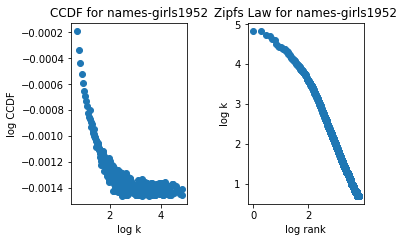

Output for names-boys1952.txt
Slope: -0.0006303340426088677
Slope: -1.6615926098107647


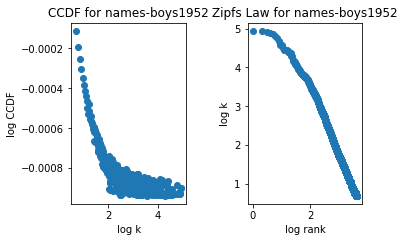

Output for names-girls2002.txt
Slope: -0.0029468834070959914
Slope: -1.29629665771105


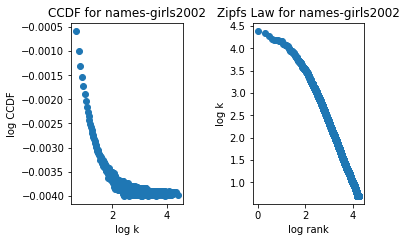

Output for names-boys2002.txt
Slope: -0.0018882421591092339
Slope: -1.3335024968688258


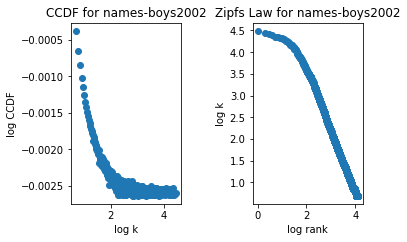

In [83]:
#QQQQQQ

def fit_lin_reg(df, lb, ub, x_col, y_col):
    # critical value for 0.025 of a normal distribution (CLT)
    z = 1.96
    interval_df  = df[(np.log10(df["k"]) > lb) & (np.log10(df["k"]) <= ub)]
    x = np.log10(interval_df[x_col])
    y = np.log10(interval_df[y_col])

    x_cleaned = x[~np.isnan(y)]
    y_cleaned = y[~np.isnan(y)]

    model = stats.linregress(x_cleaned, y_cleaned)

    print("Slope:", model.slope)

file_names = ["names-girls1952.txt", "names-boys1952.txt", "names-girls2002.txt", "names-boys2002.txt"]
# Year  Male    Female  Total
# 1952	1973506	1902064	3875570
# 2002	2065765	1974205	4039970
birth_lst = [1902064, 1973506, 1974205, 2065765]
for i, file_name in enumerate(file_names):
    fig, axes = plt.subplots(nrows=1, ncols=2)
    print("Output for", file_name)
    df = pd.read_csv(os.path.join("data", file_name), header=None, index_col=None)
    df = df.rename(columns={0: 'fname', 1: 'surname', 2: 'count'})

    # CCDF
    agg_data = df['count'].value_counts()
    df_agg = pd.DataFrame({"k": agg_data.index.values, "n_sub_k": agg_data.values})

    data = df['count'].value_counts().to_frame()

    n_sub_k = data['count'].values
    out = pd.DataFrame()
    out['k'] = data.index.values
    out['pdf'] = n_sub_k / birth_lst[i]
    out['cdf'] = out['pdf'].sort_values()[::-1].cumsum()
    out['ccdf'] = np.ones(len(out['cdf'])) - out['cdf']

    axes[0].scatter(x=np.log10(out['k']), y=np.log10(out['ccdf']))
    axes[0].set_title('CCDF for '+file_name.replace(".txt", ""))
    axes[0].set_xlabel('log k')
    axes[0].set_ylabel('log CCDF')

    fit_lin_reg(out, 0, 1.5, "k", "ccdf")

    # Zipf's
    zipf = pd.DataFrame()
    zipf['k'] = df['count'].sort_values(ascending=False).to_numpy()
    zipf['rank'] = np.asarray([i + 1 for i in range(len(df))])

    fit_lin_reg(zipf, 0, 1.5, "rank", "k")

    axes[1].scatter(x=np.log10(zipf['rank']), y=np.log10(zipf['k']))
    axes[1].set_title('Zipfs Law for '+file_name.replace(".txt", ""))
    axes[1].set_xlabel('log rank')
    axes[1].set_ylabel('log k')
    plt.tight_layout(pad=3.0)
    plt.show()